In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df_fea = pd.read_csv('C:/3курс/DS/fea.csv')
df_target = pd.read_csv('C:/3курс/DS/target.csv')


In [105]:
df_fea.head()

,Device_ID,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index
0,207dd94c-0430-43aa-b388-4893447e628e,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,Medium,Poor,4,10.0,4.04
1,3f4d1d33-ba89-4814-a168-7b4cc75be26b,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,Medium,Good,7,10.0,4.23
2,b4adca05-564f-4b70-ab69-e8d66e656463,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,Medium,Good,6,10.0,2.21
3,4147e039-31b7-480a-bbc9-03cd0f66e9f1,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,Medium,Good,8,10.0,3.13
4,3f9b0fb7-73c2-4ab7-8e30-7b492097a3f5,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,High,Good,5,10.0,4.95


In [106]:
df_target.head()

,Device_ID,current_battery_health_percent,recommended_action
0,207dd94c-0430-43aa-b388-4893447e628e,32.8,Change Phone
1,3f4d1d33-ba89-4814-a168-7b4cc75be26b,50.3,Replace Battery
2,b4adca05-564f-4b70-ab69-e8d66e656463,66.1,Replace Battery
3,4147e039-31b7-480a-bbc9-03cd0f66e9f1,46.8,Change Phone
4,3f9b0fb7-73c2-4ab7-8e30-7b492097a3f5,67.2,Replace Battery


In [107]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Device_ID                       5000 non-null   object 
 1   current_battery_health_percent  5000 non-null   float64
 2   recommended_action              5000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 117.3+ KB


In [108]:
df_fea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Device_ID                         5000 non-null   object 
 1   device_age_months                 5000 non-null   int64  
 2   battery_capacity_mah              5000 non-null   int64  
 3   avg_screen_on_hours_per_day       5000 non-null   float64
 4   avg_charging_cycles_per_week      5000 non-null   float64
 5   avg_battery_temp_celsius          5000 non-null   float64
 6   fast_charging_usage_percent       5000 non-null   float64
 7   overnight_charging_freq_per_week  5000 non-null   int64  
 8   gaming_hours_per_week             5000 non-null   float64
 9   video_streaming_hours_per_week    5000 non-null   float64
 10  background_app_usage_level        5000 non-null   object 
 11  signal_strength_avg               5000 non-null   object 
 12  chargi

In [109]:
list_columns = ['background_app_usage_level', 'signal_strength_avg']
for i in list_columns:
    print(df_fea[i].unique())

['Medium' 'High' 'Low']
['Poor' 'Good' 'Moderate']


In [110]:
list_columns = ['recommended_action']
for i in list_columns:
    print(df_target[i].unique())

['Change Phone' 'Replace Battery' 'Keep Using']


In [111]:
df_fea['background_app_usage_level'] = df_fea['background_app_usage_level'].map({'Medium': 1, 'High': 2, 'Low': 0}).astype(float)
df_target['recommended_action'] = df_target['recommended_action'].map({'Change Phone': 0, 'Replace Battery': 1, 'Keep Using': 2}).astype(float)
df_fea['signal_strength_avg'] = df_fea['signal_strength_avg'].map({'Poor': 0, 'Good': 2, 'Moderate': 1}).astype(float)


In [112]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Device_ID                       5000 non-null   object 
 1   current_battery_health_percent  5000 non-null   float64
 2   recommended_action              5000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 117.3+ KB


In [113]:
merged_df = pd.merge(df_fea, df_target, on='Device_ID')

In [114]:
merged_df

,Device_ID,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index,current_battery_health_percent,recommended_action
0,207dd94c-0430-43aa-b388-4893447e628e,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,1.0,0.0,4,10.0,4.04,32.8,0.0
1,3f4d1d33-ba89-4814-a168-7b4cc75be26b,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,1.0,2.0,7,10.0,4.23,50.3,1.0
2,b4adca05-564f-4b70-ab69-e8d66e656463,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,1.0,2.0,6,10.0,2.21,66.1,1.0
3,4147e039-31b7-480a-bbc9-03cd0f66e9f1,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,1.0,2.0,8,10.0,3.13,46.8,0.0
4,3f9b0fb7-73c2-4ab7-8e30-7b492097a3f5,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,2.0,2.0,5,10.0,4.95,67.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,39b2fb64-26ad-4c44-9373-758ef3761740,0,5000,4.9,7.3,32.2,55.6,7,1.7,13.4,1.0,1.0,5,10.0,2.98,89.1,2.0
4996,708e9ce1-193f-415e-a1f1-8bbe6528cec1,28,4000,6.1,10.6,33.9,28.8,7,4.9,6.4,0.0,2.0,5,10.0,3.60,50.8,1.0
4997,6ce90202-2b2a-46e8-b313-936f2b5f32da,21,4500,7.5,12.1,35.8,50.7,3,3.0,16.6,1.0,2.0,6,10.0,3.93,51.2,1.0
4998,a289b415-2c3e-4cea-b987-6224987f4b1b,15,4500,5.0,7.1,29.5,88.5,4,0.7,8.2,1.0,2.0,7,10.0,2.28,78.1,2.0


In [115]:
df_final = merged_df.drop(columns=['Device_ID'])

In [116]:
df_final

,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index,current_battery_health_percent,recommended_action
0,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,1.0,0.0,4,10.0,4.04,32.8,0.0
1,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,1.0,2.0,7,10.0,4.23,50.3,1.0
2,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,1.0,2.0,6,10.0,2.21,66.1,1.0
3,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,1.0,2.0,8,10.0,3.13,46.8,0.0
4,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,2.0,2.0,5,10.0,4.95,67.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,5000,4.9,7.3,32.2,55.6,7,1.7,13.4,1.0,1.0,5,10.0,2.98,89.1,2.0
4996,28,4000,6.1,10.6,33.9,28.8,7,4.9,6.4,0.0,2.0,5,10.0,3.60,50.8,1.0
4997,21,4500,7.5,12.1,35.8,50.7,3,3.0,16.6,1.0,2.0,6,10.0,3.93,51.2,1.0
4998,15,4500,5.0,7.1,29.5,88.5,4,0.7,8.2,1.0,2.0,7,10.0,2.28,78.1,2.0


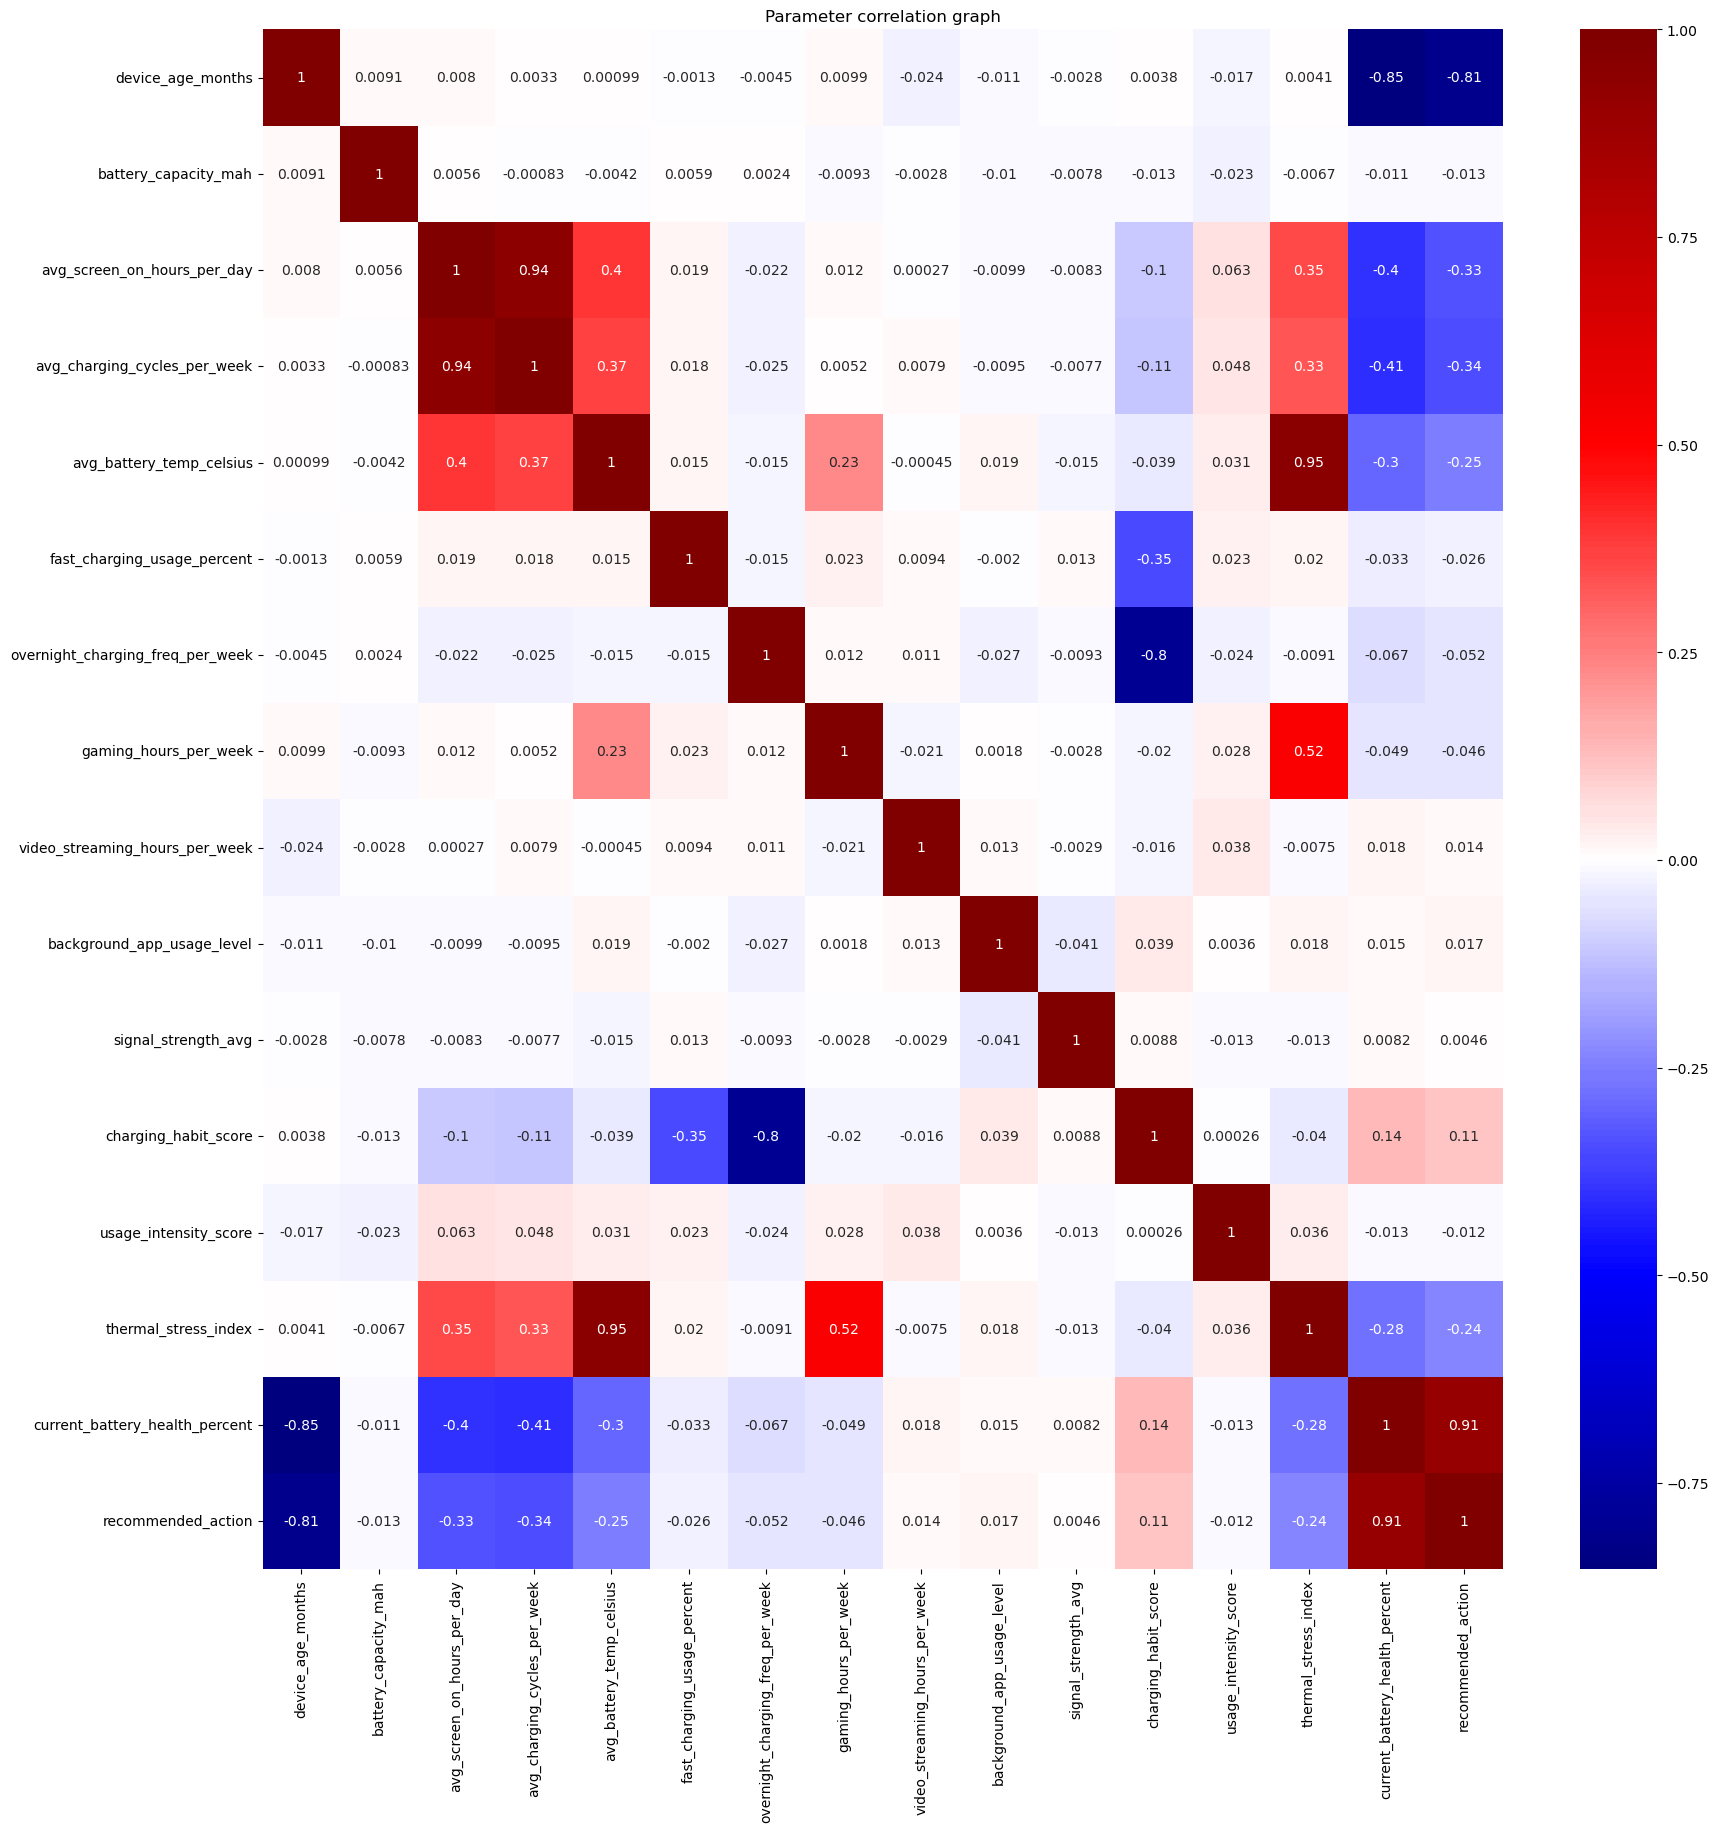

In [117]:
import seaborn as seaborn
plt.figure(figsize=(20, 20))
seaborn.heatmap(df.corr(), annot=True, cmap='seismic', center=0)
plt.title('Parameter correlation graph')
plt.show()

In [120]:
from sklearn.model_selection import train_test_split

x = df_final.drop(['recommended_action'], axis = 1).to_numpy()
y = df_final['recommended_action'].to_numpy()
print(f"Размерность X: {x.shape}")  
print(f"Размерность y: {y.shape}")  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(f"Размерность x_train_scaled: {x_train_scaled.shape}")  

Размерность X: (5000, 15)
Размерность y: (5000,)
Размерность x_train_scaled: (4500, 15)


In [121]:
#Создание пар признаков и меток
tensor_train = []
tensor_test = []

for i in range(len(x_train_scaled)):
    temp_train = []
    temp_train.append(x_train_scaled[i])
    temp_train.append(y_train[i])
    tensor_train.append(temp_train)

for i in range(len(x_test_scaled)):
    temp_test = []
    temp_test.append(x_test_scaled[i])
    temp_test.append(y_test[i])
    tensor_test.append(temp_test)


In [96]:
# def create_pairs(x_train_scaled, x_test_scaled, y_train, y_test):
#     tensor_train = []
#     tensor_test = []
#     for i in range(len(x_train_scaled)):
#         tensor_train.append([x_train_scaled[i], y_train[i]])
#     for i in range(len(x_test_scaled)):
#         tensor_test.append([x_test_scaled[i], y_test[i]])
#     return tensor_train, tensor_test

In [97]:
!pip install torch 
!pip install torchvision 

In [123]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class NeuralNet(nn.Module):
    def __init__(self, input_size=15, hidden_size=8, num_classes=3):
        super(NeuralNet, self).__init__()
        
        # Первый слой
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()  # переименовал с softmax1 на relu1
        self.dropout1 = nn.Dropout(p=0.3)
        
        # Второй слой
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()  # заменил Sigmoid на ReLU (лучше работает)
        self.dropout2 = nn.Dropout(p=0.2) 
        
        # Выходной слой
        self.fc3 = nn.Linear(hidden_size, num_classes)
        # Softmax НЕ нужен здесь
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)  # ПРИМЕНЯЕМ dropout
        
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)  # ПРИМЕНЯЕМ dropout
        
        out = self.fc3(out)  # сырые логиты, без softmax!
        return out

model = NeuralNet().float()

# Параметры обучения
num_epochs = 100  
learning_rate = 0.001  

# Функция потерь и оптимизатор
criterion = nn.CrossEntropyLoss()  # уже включает softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# Обучение модели
for epoch in range(num_epochs):
    model.train()  # включаем режим обучения
    total_loss = 0
    
    for i, (t_x, t_y) in enumerate(train_loader):
        t_x = t_x.float()
        t_y = t_y.long()
        
        # Прямой проход
        outputs = model(t_x)
        loss = criterion(outputs, t_y)
        
        # Обратный проход
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    print(model.forward(t_x[0]))

Epoch [1/100], Loss: 1.0090
tensor([-0.3710,  0.3443, -0.0890], grad_fn=<ViewBackward0>)
Epoch [2/100], Loss: 0.8338
tensor([ 0.0181,  0.1462, -1.2061], grad_fn=<ViewBackward0>)
Epoch [3/100], Loss: 0.5822
tensor([-0.4919,  0.6773,  0.1485], grad_fn=<ViewBackward0>)
Epoch [4/100], Loss: 0.6750
tensor([-1.7187,  0.6116,  1.7824], grad_fn=<ViewBackward0>)
Epoch [5/100], Loss: 0.3760
tensor([-1.2112,  1.0097,  0.3326], grad_fn=<ViewBackward0>)
Epoch [6/100], Loss: 0.2071
tensor([-0.6999,  0.7833,  0.1911], grad_fn=<ViewBackward0>)
Epoch [7/100], Loss: 0.2175
tensor([ 2.3827, -1.7519, -9.2306], grad_fn=<ViewBackward0>)
Epoch [8/100], Loss: 0.4152
tensor([-1.9373,  1.7999,  0.2482], grad_fn=<ViewBackward0>)
Epoch [9/100], Loss: 0.3326
tensor([ 2.2388, -0.4703, -6.9213], grad_fn=<ViewBackward0>)
Epoch [10/100], Loss: 0.1669
tensor([  2.6978,  -1.0277, -13.5705], grad_fn=<ViewBackward0>)
Epoch [11/100], Loss: 0.1839
tensor([-0.7581,  0.5862,  0.4491], grad_fn=<ViewBackward0>)
Epoch [12/100], 

In [124]:
model.forward(t_x)

tensor([[  -4.2881,    2.6764,  -18.9877],
        [  -2.9413,    3.0057,  -24.5960],
        [   7.5094,    5.7805, -181.0241],
        [ -34.7367,   -5.5210,   19.9971],
        [  -8.6950,    2.2757,    4.9224],
        [  -0.7171,    0.3053,   -5.4844],
        [  -3.4312,    1.9046,  -15.2313],
        [ -18.8473,    3.7071,    8.3588],
        [  -2.6378,    1.1252,   -5.6546],
        [ -29.4790,   -4.3545,   16.9782],
        [   1.8606,    1.2472,  -36.5542],
        [  -1.2079,    3.4351,  -48.4656],
        [   2.0622,    3.3916,  -46.8260],
        [  -2.3838,    3.1557,  -37.6958],
        [ -21.1190,    4.1997,    9.2814],
        [  -3.8282,    1.7239,   -8.9151],
        [  -1.6730,    3.2940,  -42.4442],
        [  -9.9942,   -3.3221,    6.4572],
        [ -25.3516,    4.9952,   10.8913],
        [ -23.5221,   -3.0007,   13.5418]], grad_fn=<AddmmBackward0>)

In [125]:
t_y

tensor([1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2])

In [71]:
#import torch
#from torch.utils.data import TensorDataset, DataLoader

# 1. Разделяем признаки и целевую переменную
# Предположим, колонка с таргетом называется 'target'
#сделать нормировку через тензор 
#X = df_final.drop(columns=['current_battery_health_percent']).values
#y = df_final['current_battery_health_percent'].values

# 2. Конвертируем в тензоры PyTorch
# (float32 для признаков, long для классификации или float32 для регрессии)
#X_tensor = torch.tensor(X, dtype=torch.float32)
#y_tensor = torch.tensor(y, dtype=torch.long) 

# 3. Создаем датасет
#custom_dataset = TensorDataset(X_tensor, y_tensor)

# 4. Создаем DataLoader для обучения
#train_loader = DataLoader(dataset=custom_dataset, batch_size=64, shuffle=True)

In [73]:
#import torch
#import torch.nn as nn
#import torchvision
#i#mport torchvision.transforms as transforms

#class Dataset(torch.utils.data.Dataset):
#  'Characterizes a dataset for PyTorch'
#  def __init__(self, list_IDs, labels):
#        'Initialization'
#        self.labels = labels
#        self.list_IDs = list_IDs

#  def __len__(self):
#        'Denotes the total number of samples'
#        return len(self.list_IDs)

 ''' def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = torch.load('data/' + ID + '.pt')
        y = self.labels[ID]

        return X, y'''

IndentationError: unexpected indent (4025311398.py, line 17)

In [74]:
'''import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import torch
from torch.utils.data import TensorDataset, DataLoader

# 1. Разделяем признаки и целевую переменную
# Предположим, колонка с таргетом называется 'target'
X = df_final.drop(columns=['recommended_action']).values
y = df_final['recommended_action'].values

# 2. Конвертируем в тензоры PyTorch
# (float32 для признаков, long для классификации или float32 для регрессии)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long) 

# 3. Создаем датасет
custom_dataset = TensorDataset(X_tensor, y_tensor)
# Параметры DataLoader
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=X_tensor,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=y_tensor,
                                          batch_size=batch_size,
                                          shuffle=False)

# Определение модели
class NeuralNet(nn.Module):
    def __init__(self, input_size=1500, hidden_size=500, num_classes=10):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet()

# Параметры обучения
num_epochs = 5
learning_rate = 0.001

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Обучение модели
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Перемещение тензоров на конфигурированное устройство
        images = images.reshape(-1, 28*28)
        
        # Прямое распространение
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Обратное распространение и оптимизатор
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))'''


"import torch\nimport torch.nn as nn\nimport torchvision\nimport torchvision.transforms as transforms\n\nimport torch\nfrom torch.utils.data import TensorDataset, DataLoader\n\n# 1. Разделяем признаки и целевую переменную\n# Предположим, колонка с таргетом называется 'target'\nX = df_final.drop(columns=['recommended_action']).values\ny = df_final['recommended_action'].values\n\n# 2. Конвертируем в тензоры PyTorch\n# (float32 для признаков, long для классификации или float32 для регрессии)\nX_tensor = torch.tensor(X, dtype=torch.float32)\ny_tensor = torch.tensor(y, dtype=torch.long) \n\n# 3. Создаем датасет\ncustom_dataset = TensorDataset(X_tensor, y_tensor)\n# Параметры DataLoader\nbatch_size = 100\ntrain_loader = torch.utils.data.DataLoader(dataset=X_tensor,\n                                           batch_size=batch_size,\n                                           shuffle=True)\n\ntest_loader = torch.utils.data.DataLoader(dataset=y_tensor,\n                                         

In [75]:
'''import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader, random_split

# 1. Разделяем признаки и целевую переменную
X = df_final.drop(columns=['recommended_action']).values
y = df_final['recommended_action'].values

# 2. Конвертируем в тензоры PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long) 

# 3. Создаем датасет
custom_dataset = TensorDataset(X_tensor, y_tensor)

# 4. Разделяем на train и test
train_size = int(0.8 * len(custom_dataset))
test_size = len(custom_dataset) - train_size
train_dataset, test_dataset = random_split(custom_dataset, [train_size, test_size])

# 5. Создаем DataLoader с ПРАВИЛЬНЫМИ датасетами
batch_size = 100
train_loader = DataLoader(dataset=train_dataset,  # Используем train_dataset
                         batch_size=batch_size,
                         shuffle=True)

test_loader = DataLoader(dataset=test_dataset,    # Используем test_dataset
                        batch_size=batch_size,
                        shuffle=False)

# 6. Определяем количество признаков и классов
input_size = X.shape[1]  # Количество признаков
num_classes = len(torch.unique(y_tensor))  # Количество уникальных классов
print(f"Размер входа: {input_size}")
print(f"Количество классов: {num_classes}")

# 7. Определение модели с правильными параметрами
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size=500, num_classes=10):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Используем правильные параметры
model = NeuralNet(input_size=input_size, num_classes=num_classes)

# 8. Параметры обучения
num_epochs = 5
learning_rate = 0.001

# 9. Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 10. Обучение модели
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()  # Устанавливаем режим обучения
    epoch_loss = 0
    
    for i, (features, labels) in enumerate(train_loader):  
        # Важно: используем features вместо images
        # Убираем reshape(-1, 28*28) - ваши данные не изображения!
        
        # Прямое распространение
        outputs = model(features)  # features уже имеют правильную форму
        loss = criterion(outputs, labels)
        
        # Обратное распространение и оптимизатор
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
    avg_loss = epoch_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# 11. Тестирование модели
model.eval()  # Устанавливаем режим оценки
with torch.no_grad():
    correct = 0
    total = 0
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Точность на тестовой выборке: {accuracy:.2f}%')'''

'import torch\nimport torch.nn as nn\nimport torchvision\nimport torchvision.transforms as transforms\nfrom torch.utils.data import TensorDataset, DataLoader, random_split\n\n# 1. Разделяем признаки и целевую переменную\nX = df_final.drop(columns=[\'recommended_action\']).values\ny = df_final[\'recommended_action\'].values\n\n# 2. Конвертируем в тензоры PyTorch\nX_tensor = torch.tensor(X, dtype=torch.float32)\ny_tensor = torch.tensor(y, dtype=torch.long) \n\n# 3. Создаем датасет\ncustom_dataset = TensorDataset(X_tensor, y_tensor)\n\n# 4. Разделяем на train и test\ntrain_size = int(0.8 * len(custom_dataset))\ntest_size = len(custom_dataset) - train_size\ntrain_dataset, test_dataset = random_split(custom_dataset, [train_size, test_size])\n\n# 5. Создаем DataLoader с ПРАВИЛЬНЫМИ датасетами\nbatch_size = 100\ntrain_loader = DataLoader(dataset=train_dataset,  # Используем train_dataset\n                         batch_size=batch_size,\n                         shuffle=True)\n\ntest_loader = 

In [76]:
'''import torch
from torch.utils.data import TensorDataset, DataLoader

# 1. Разделяем признаки и целевую переменную
# Предположим, колонка с таргетом называется 'target'
X = df_final.drop(columns=['current_battery_health_percent']).values
y = df_final['current_battery_health_percent'].values

# 2. Конвертируем в тензоры PyTorch
# (float32 для признаков, long для классификации или float32 для регрессии)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long) 

# 3. Создаем датасет
custom_dataset = TensorDataset(X_tensor, y_tensor)

# 4. Создаем DataLoader для обучения
train_loader = DataLoader(dataset=custom_dataset, batch_size=64, shuffle=True)'''

"import torch\nfrom torch.utils.data import TensorDataset, DataLoader\n\n# 1. Разделяем признаки и целевую переменную\n# Предположим, колонка с таргетом называется 'target'\nX = df_final.drop(columns=['current_battery_health_percent']).values\ny = df_final['current_battery_health_percent'].values\n\n# 2. Конвертируем в тензоры PyTorch\n# (float32 для признаков, long для классификации или float32 для регрессии)\nX_tensor = torch.tensor(X, dtype=torch.float32)\ny_tensor = torch.tensor(y, dtype=torch.long) \n\n# 3. Создаем датасет\ncustom_dataset = TensorDataset(X_tensor, y_tensor)\n\n# 4. Создаем DataLoader для обучения\ntrain_loader = DataLoader(dataset=custom_dataset, batch_size=64, shuffle=True)"

In [77]:
'''X = df_final.drop(columns=['current_battery_health_percent']).values
y = df_final['current_battery_health_percent'].values

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)'''

"X = df_final.drop(columns=['current_battery_health_percent']).values\ny = df_final['current_battery_health_percent'].values\n\nX_tensor = torch.tensor(X, dtype=torch.float32)\ny_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)\n\ndataset = TensorDataset(X_tensor, y_tensor)\ntrain_size = int(0.8 * len(dataset))\ntest_size = len(dataset) - train_size\ntrain_dataset, test_dataset = random_split(dataset, [train_size, test_size])\n\ntrain_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)\ntest_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)"

In [78]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Параметры DataLoader
batch_size = 32
train_loader = torch.utils.data.DataLoader(dataset=tensor_train,
                                            batch_size=batch_size,
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=tensor_test,
                                          batch_size=batch_size,
                                          shuffle=False)

# Определение модели
class NeuralNet(nn.Module):
    def __init__(self, input_size=14, hidden_size=8, num_classes=3):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.softmax1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.softmax2 = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.softmax3 = nn.Softmax()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.softmax1(out)
        out = self.fc2(out)
        out = self.softmax2(out)
        out = self.fc3(out)
        out = self.softmax3(out)
        return out

model = NeuralNet().float()

# Параметры обучения
num_epochs = 500
learning_rate = 1e-6

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Обучение модели
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (t_x, t_y) in enumerate(train_loader):  

        t_x = t_x.float()
        t_y = t_y.long()

        # Прямое распространение
        outputs = model(t_x)
        loss = criterion(outputs, t_y)
        
        # Обратное распространение и оптимизатор
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch%25 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        print(model.forward(t_x[0]))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x15 and 14x8)